In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [87]:
car_df=pd.read_csv('CAR DETAILS.csv')
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [88]:
##SHAPE OF CARDF

car_df['owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [89]:
car_df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [90]:
car_df.duplicated().sum()


763

In [91]:
car_df.shape


(4340, 8)

In [92]:
car_df.drop_duplicates(inplace= True)


In [93]:
car_df.shape


(3577, 8)

In [94]:
car_df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [95]:
## create new column of car brand name 

car_df['brand name']=car_df['name'].str.split(' ').str.slice(0,1).str.join('')
car_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand name
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai


In [96]:
## change the name of column 


car_df['name']=car_df['name'].str.split(' ').str.slice(0,3).str.join(' ')
car_df.rename(columns={'name':'Model name'},inplace=True)
car_df.drop('Model name',axis=1,inplace=True)

In [97]:
## Modify the sequce of columns 
car_df=car_df.iloc[:,[7,0,1,2,3,4,5,6]]
car_df

,brand name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [98]:
car_df.columns

Index(['brand name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

In [99]:
cat_cols=car_df.dtypes[car_df.dtypes=='object'].index
num_cols=car_df.dtypes[car_df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['brand name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')
Index(['year', 'selling_price', 'km_driven'], dtype='object')


## EDA

In [100]:
car_df.columns

Index(['brand name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

In [101]:
car_df.describe()

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [102]:
car_df[car_df['km_driven']>300000]

,brand name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
69,Chevrolet,2010,280000,350000,Diesel,Individual,Manual,Second Owner
525,Maruti,2016,665000,560000,Diesel,Dealer,Manual,First Owner
1243,Maruti,2009,250000,806599,Petrol,Dealer,Manual,First Owner
1674,Volkswagen,2011,350000,312000,Diesel,Individual,Manual,Third Owner
2394,Toyota,2009,350000,350000,Diesel,Individual,Manual,First Owner
3679,Toyota,2006,400000,400000,Diesel,Individual,Manual,Third Owner
3718,Toyota,2009,420000,347089,Diesel,Dealer,Manual,First Owner


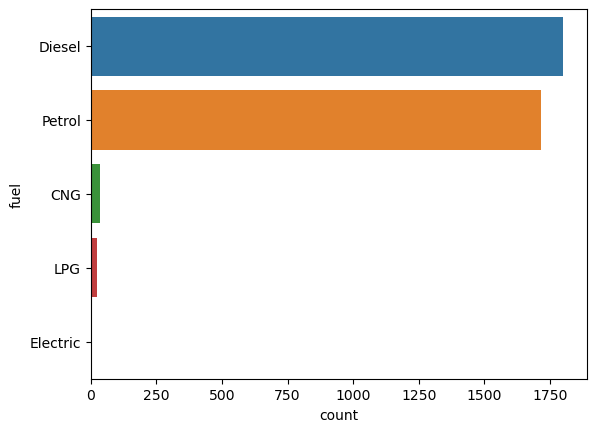

In [103]:
## Count of car based on fuel types 

import seaborn as sns 

sns.countplot(y=car_df['fuel'],order=car_df['fuel'].value_counts().sort_values(ascending=False).index)
plt.show()

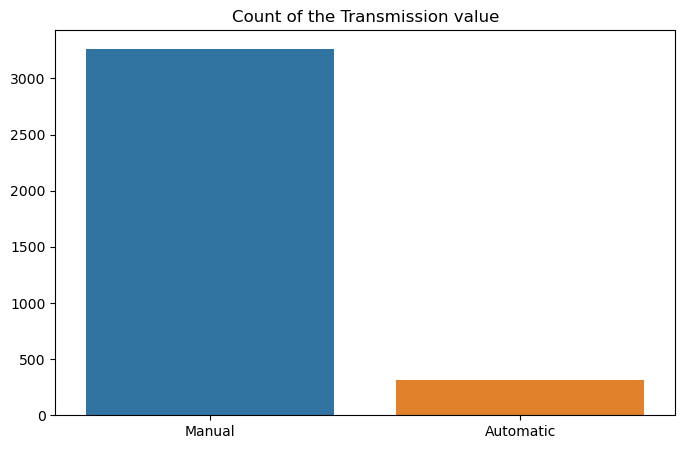

In [104]:
plt.figure(figsize=(8,5))
sns.barplot(x=car_df['transmission'].value_counts().index,y=car_df['transmission'].value_counts().values)
plt.title('Count of the Transmission value')
plt.show()

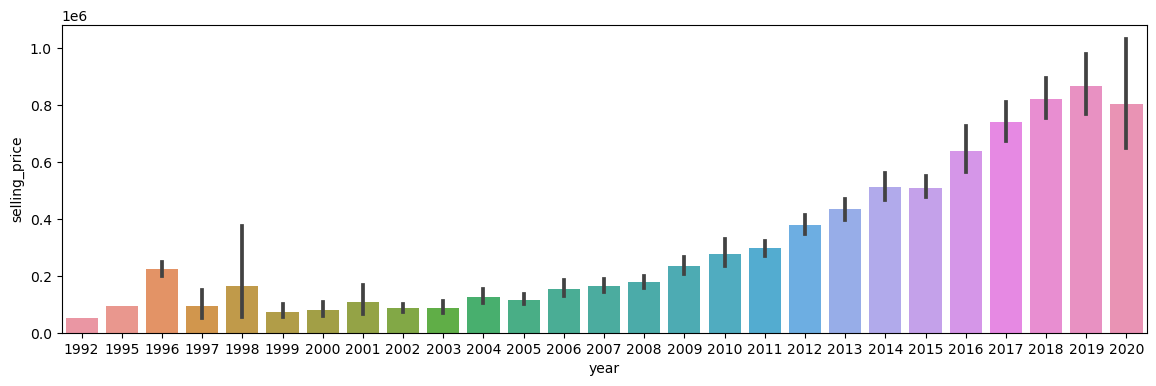

In [105]:
plt.figure(figsize=(14,4))
sns.barplot(data=car_df,x='year',y='selling_price')
plt.show()

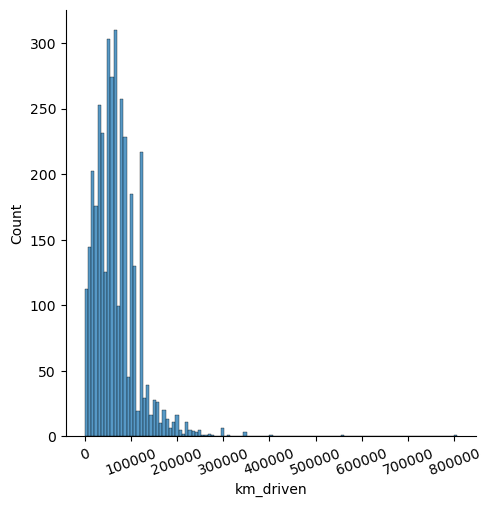

In [106]:
sns.displot(data=car_df,x='km_driven')
plt.xticks(rotation=20)
plt.show()

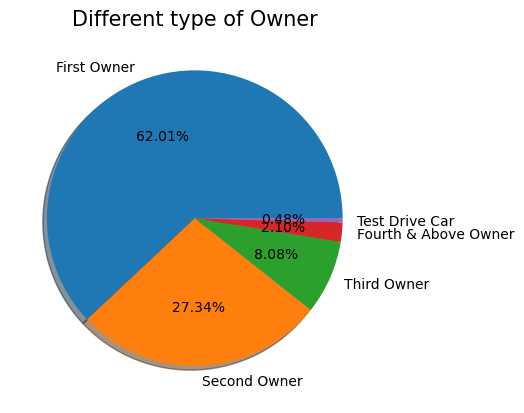

In [107]:
##Different Types of owner pie chart 

owner = car_df['owner'].value_counts().reset_index()

plt.pie(x=owner['owner'],labels=owner['index'],autopct='%0.2f%%',shadow=True)
plt.title('Different type of Owner',fontsize=15)
plt.show()


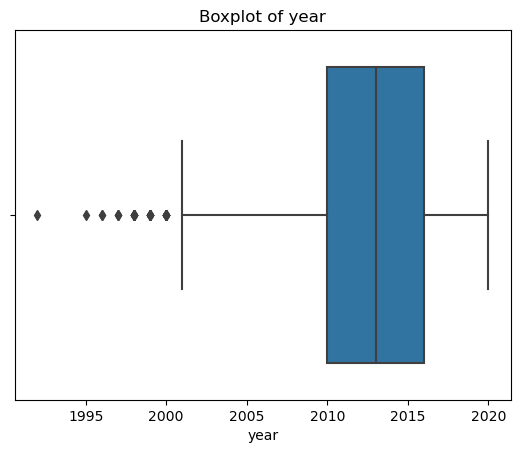

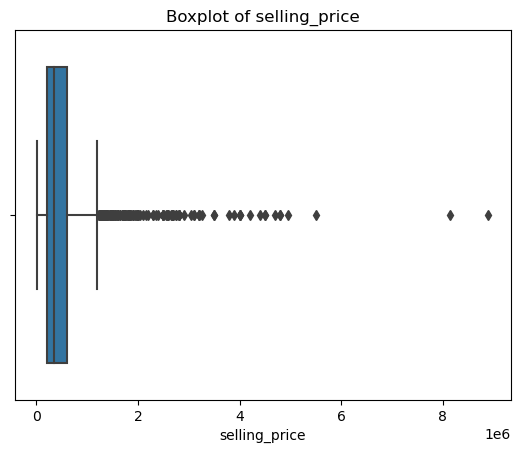

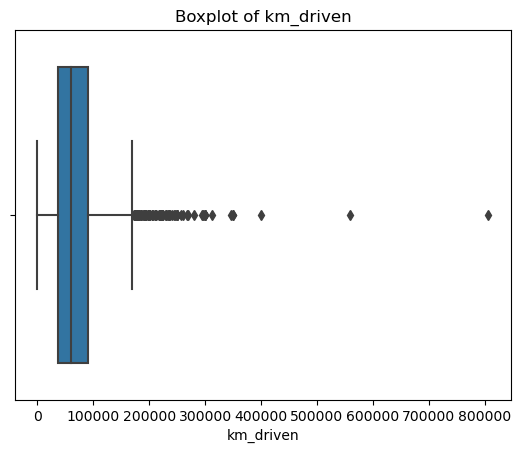

In [108]:
##Boxplot for numerical cols

for i in num_cols:
    sns.boxplot(x=car_df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()
    

<b>Outliers <br>
 1) There are outliers in year boxplot <br>
 2) There are outliers in Selling price boxplot <br>
 3) There are outliers in Km driven  boxplot

In [109]:
## Handling the outliers for selling price 
car_df=car_df[car_df['selling_price']<1.04e6].reset_index(drop=True)
car_df.shape

(3341, 8)

In [110]:
car_df=car_df[car_df['km_driven']<400000].reset_index(drop=True)
car_df.shape

(3338, 8)

In [111]:
car_df=car_df[car_df['year']>1998].reset_index(drop=True)
car_df.shape



(3322, 8)

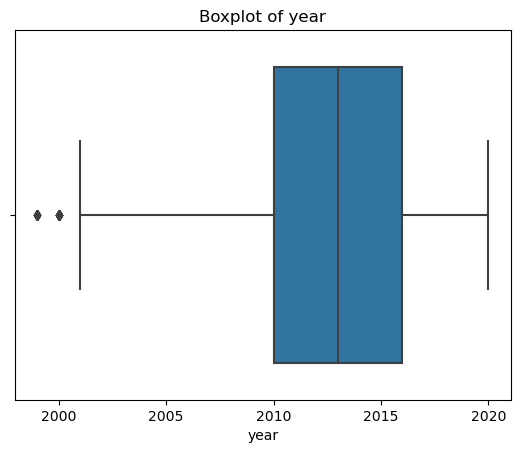

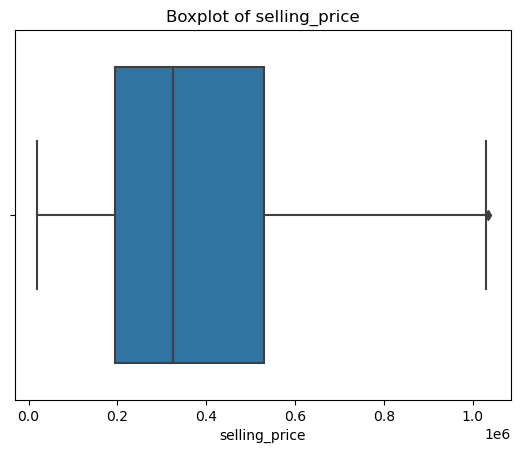

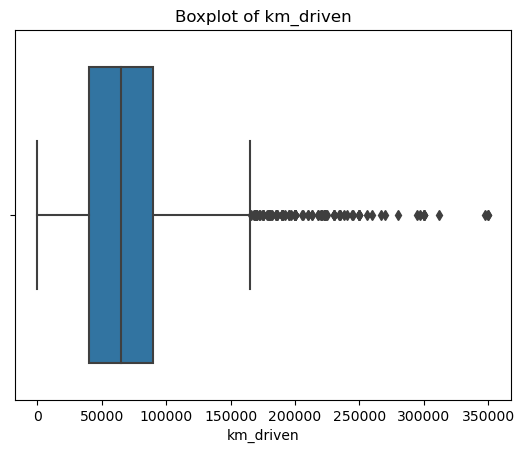

In [112]:
##Boxplot for numerical cols

for i in num_cols:
    sns.boxplot(x=car_df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()
    

In [113]:
car_df.describe()


,year,selling_price,km_driven
count,3322.000000,3.322000e+03,3322.000000
mean,2012.807947,3.783706e+05,70284.270319
std,4.110835,2.329119e+05,44975.235805
min,1999.000000,2.000000e+04,1.000000
25%,2010.000000,1.950000e+05,40000.000000
50%,2013.000000,3.250000e+05,64606.500000
75%,2016.000000,5.300000e+05,90000.000000
max,2020.000000,1.035000e+06,350000.000000


## Selecting Dependent and independent Features


In [114]:
x=car_df.drop(['selling_price'],axis=1)
y=car_df['selling_price']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(3322, 7)
(3322,)


In [115]:
from sklearn.model_selection import train_test_split

In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2491, 7)
(831, 7)
(2491,)
(831,)


## Evaluate problem of regression model 

In [117]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [118]:
def eval_model(ytest,ypred):
    mae=mean_absolute_error(ytest,ypred)
    mse=mean_squared_error(ytest,ypred)
    rmse=np.sqrt(mse)
    r2s=r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2_SCORE',r2s)
    
def mscore(model):
    print('Training Score',model.score(x_train,y_train)) # Trainng R2 score
    print('Testing Score',model.score(x_test,y_test))    # Test R2 Score

In [119]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [120]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [121]:
print(car_df.columns)
print(cat_cols)   ##[0,3,4,5,6] 
print(x_train.columns)

Index(['brand name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')
Index(['brand name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')
Index(['brand name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')


### 1) Linear Regression

In [122]:
s1=ColumnTransformer(transformers=[('encoder',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'),[0,3,4,5,6])],
                    remainder='passthrough')

s2=LinearRegression()

pipe_lr=Pipeline([('s1',s1),('s2',s2)])

pipe_lr.fit(x_train,y_train)
ypred_lr=pipe_lr.predict(x_test)
eval_model(y_test,ypred_lr)

MAE 105102.32264610638
MSE 18632532321.175922
RMSE 136501.03413958417
R2_SCORE 0.6663074129906613


### 2)Ridge Regression 

In [123]:
s1=ColumnTransformer(transformers=[('encoder',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'),[0,3,4,5,6])],
                    remainder='passthrough')

s2=Ridge(alpha=4)

pipe_ridge=Pipeline([('s1',s1),('s2',s2)])

pipe_ridge.fit(x_train,y_train)
ypred_ridge=pipe_ridge.predict(x_test)
eval_model(y_test,ypred_ridge)

MAE 106184.41057313385
MSE 19166842454.84914
RMSE 138444.3659194882
R2_SCORE 0.6567383792330712


### 3)Lasso Regression 
/

In [124]:
s1=ColumnTransformer(transformers=[('encoder',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'),[0,3,4,5,6])],
                    remainder='passthrough')

s2=Lasso(alpha=7)

pipe_lasso=Pipeline([('s1',s1),('s2',s2)])

pipe_lasso.fit(x_train,y_train)
ypred_lasso=pipe_lasso.predict(x_test)
eval_model(y_test,ypred_lasso)

MAE 105090.87017546663
MSE 18640294483.47164
RMSE 136529.46379251493
R2_SCORE 0.6661683993572701


### 4) KNN Regression


In [125]:
s1=ColumnTransformer(transformers=[('encoder',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'),[0,3,4,5,6])],
                    remainder='passthrough')

s2=KNeighborsRegressor(n_neighbors=7)

pipe_knn=Pipeline([('s1',s1),('s2',s2)])

pipe_knn.fit(x_train,y_train)
ypred_knn=pipe_knn.predict(x_test)
eval_model(y_test,ypred_knn)

MAE 137828.86986419116
MSE 33600308060.07598
RMSE 183303.86809905563
R2_SCORE 0.39824745624432256


### 5) DT Regression

In [126]:
s1=ColumnTransformer(transformers=[('encoder',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'),[0,3,4,5,6])],
                    remainder='passthrough')

s2=DecisionTreeRegressor(criterion='squared_error',max_depth=10,min_samples_split=15)

pipe_dtr=Pipeline([('s1',s1),('s2',s2)])

pipe_dtr.fit(x_train,y_train)
ypred_dtr=pipe_dtr.predict(x_test)
eval_model(y_test,ypred_dtr)

MAE 101989.79255534646
MSE 19193724205.81196
RMSE 138541.4169330311
R2_SCORE 0.6562569502535047


### 6) RF Regression

In [127]:
s1=ColumnTransformer(transformers=[('encoder',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'),[0,3,4,5,6])],
                    remainder='passthrough')

s2=RandomForestRegressor(n_estimators=100,criterion='squared_error',max_depth=10,min_samples_split=15,random_state=5)

pipe_rfr=Pipeline([('s1',s1),('s2',s2)])

pipe_rfr.fit(x_train,y_train)
ypred_rfr=pipe_rfr.predict(x_test)
eval_model(y_test,ypred_rfr)

MAE 95450.89004222024
MSE 16815953282.64613
RMSE 129676.34048910438
R2_SCORE 0.6988407771316707


## Inference
1) RF Reg is the best model in terms of R2_Score and RMSE.

### Save the model

In [128]:
import pickle

In [129]:
pickle.dump(pipe_rfr,open('rf.pkl','wb'))
pickle.dump(car_df,open('car_df.pkl','wb'))


## Testing Prediction on  the values 


In [130]:
pipe_rfr.predict(pd.DataFrame([['Honda',2014,141000,'Diesel','Individual','Manual','Second Owner']],columns=['brand name', 'year', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner']))

array([498165.34551812])